# Map of Image to Image

## 3.1 Homography Matrix

## 3.1.1 Homography Matrix

Assume a homography matrix $\mathbf{H} \in \mathbb{R}^{3\times 3}$, point matrix $[\mathbf{p}_1,\mathbf{p}_2,\cdots,\mathbf{p}_n] \in \mathbb{R}^{3\times n}$ and the correspondence point matrix $[\mathbf{p}_1',\mathbf{p}_2',\cdots,\mathbf{p}_n'] \in \mathbb{R}^{3\times n}$. $\mathbf{p}_i=[x,y,w]^T$ and $\mathbf{p}_i'=[x',y',w']^T$.

$$
\mathbf{H}\mathbf{p}_i
=
\left[ 
    \begin{matrix}
        \mathbf{h}_1 \\
        \mathbf{h}_2 \\
        \mathbf{h}_3 \\
    \end{matrix}
\right]
\mathbf{p}_i
=
\left[ 
    \begin{matrix}
        \mathbf{h}_1\mathbf{p}_i \\
        \mathbf{h}_2\mathbf{p}_i \\
        \mathbf{h}_3\mathbf{p}_i \\
    \end{matrix}
\right]
$$

### 3.1.1.1 DLT (Direct Linear Transform)

A homography matrix $\mathbf{H}$ satisfies:

$$
    \mathbf{p}_i'\times\mathbf{Hp}_i
    =
    \left[
        \begin{matrix}
            y'_i\mathbf{h}_3\mathbf{p}_i-w'_i\mathbf{h}_2\mathbf{p}_i\\
            w'_i\mathbf{h}_1\mathbf{p}_i-x'_i\mathbf{h}_3\mathbf{p}_i\\
            x'_i\mathbf{h}_2\mathbf{p}_i-y'_i\mathbf{h}_1\mathbf{p}_i
        \end{matrix}
    \right]
    =\mathbf{0},
$$

where $\mathbf{h}_i$ is the $i$-th row of $\mathbf{H}$. Rewrite the above equation as:

$$
   \left[
       \begin{matrix}
           \mathbf{0} & -w'_i \mathbf{p}_i^T  & y'_i \mathbf{p}_i^T \\
           w'_i\mathbf{p}_i^T & \mathbf{0} & -x'_i\mathbf{p}_i^T\\
           -y'_i\mathbf{p}_i^T & x'_i \mathbf{p}_i & \mathbf{0}
       \end{matrix}
   \right]
   \left[
       \begin{matrix}
           \mathbf{h}_1^T\\
           \mathbf{h}_2^T\\
           \mathbf{h}_3^T
       \end{matrix}
   \right]
   =
   \mathbf{0},
$$

since the third row of the left matrix in the above equation can be obtained by the linear combination of the first row and second row, thus it is redundant and we can simplify it as:

$$
   \left[
       \begin{matrix}
           \mathbf{0} & -w'_i \mathbf{p}_i^T  & y'_i \mathbf{p}_i^T \\
           w'_i\mathbf{p}_i^T & \mathbf{0} & -x'_i\mathbf{p}_i^T\\
       \end{matrix}
   \right]
   \left[
       \begin{matrix}
           \mathbf{h}_1^T\\
           \mathbf{h}_2^T\\
           \mathbf{h}_3^T
       \end{matrix}
   \right]
   =
   \mathbf{0},
$$

and this will be written

$$
    \mathbf{X}_i \mathbf{h}=\mathbf{0}
$$

since we must fit $n$ points, then we obtian such equation:
$$
   \left[
       \begin{matrix}
           \mathbf{0} & -w'_1 \mathbf{p}_1^T  & y'_1 \mathbf{p}_1^T \\
           w'_1\mathbf{p}_1^T & \mathbf{0} & -x'_1\mathbf{p}_1^T\\
           &\vdots&\\
           \mathbf{0} & -w'_i \mathbf{p}_i^T  & y'_i \mathbf{p}_i^T \\
           w'_i\mathbf{p}_i^T & \mathbf{0} & -x'_i\mathbf{p}_i^T\\
           & \vdots &\\
           \mathbf{0} & -w'_n \mathbf{p}_n^T  & y'_n \mathbf{p}_n^T \\
           w'_n\mathbf{p}_n^T & \mathbf{0} & -x'_n\mathbf{p}_n^T\\
       \end{matrix}
   \right]
   \left[
       \begin{matrix}
           \mathbf{h}_1^T\\
           \mathbf{h}_2^T\\
           \mathbf{h}_3^T
       \end{matrix}
   \right]
   =
   \mathbf{X}\mathbf{h}
   =
   \mathbf{0},
$$

where matrix $\mathbf{X}\in \mathbb{R}^{(2n)\times 9}$, thus optimal $\mathbf{h} \in \mathbb{R}^{9}$ is the right-singular vector of $\mathbf{X}$  with the least singular value. The homography matrix is only determined by the scale, so the degree of $\mathbf{H}$ is 8, and one of the entry in $\mathbf{H}$ shall be one for normalization.

NOTE:
$$
   \mathbf{u}\times \mathbf{v}=
   \left\lvert
     \begin{matrix}
     \mathbf{i} & \mathbf{j} & \mathbf{k}\\
     u_1 & u_2 & u_3\\
     v_1 & v_2 & v_3
     \end{matrix}
   \right\rvert
   = \left\lvert 
       \begin{matrix}
           u_2 & u_3 \\
           v_2 & v_3
       \end{matrix}
    \right\rvert \mathbf{i}
   - \left\lvert
       \begin{matrix}
           u_1 & u_3\\
           v_1 & v_3
       \end{matrix}
    \right\rvert\mathbf{j} 
   + \left\lvert
       \begin{matrix}
            u_1 & u_2 \\
            v_1 & v_2
       \end{matrix}
    \right\rvert\mathbf{k}
$$

## 3.1.2 Affine Transform Matrix

$$
\left[
    \begin{array}{c}
        x'\\
        y'\\
        1
    \end{array}
\right]
=
\left[
    \begin{array}{c}
        a_1 & a_2 & t_x\\
        a_3 & a_4 & t_y\\
        0  & 0 & 1
    \end{array}
\right]
\left[
    \begin{array}{c}
        x\\
        y\\
        1\\
    \end{array}
\right]
=
\left[
    \begin{array}{c}
        \mathbf{A}\mathbf{p}+\mathbf{t}\\
        1
    \end{array}
\right]
\left[
    \begin{array}{c}
       \mathbf{p}'\\
        1
    \end{array}
\right]
\Rightarrow  \mathbf{Ap}+\mathbf{t}=\mathbf{p}'
$$

$$
\mathbf{X}
\left[
    \begin{array}{c}
        \mathbf{V}_1& \mathbf{V}_2
    \end{array}
\right]
=
\left[
    \begin{array}{c}
        \lambda_1\mathbf{V}_1 & \lambda_2 \mathbf{V}_2
    \end{array}
\right]
=
\mathbf{X}
\left[
    \begin{array}{c}
        \mathbf{B} \\ \mathbf{C}
    \end{array}
\right]
=
\left[
    \begin{array}{c}
        \mathbf{X}_1 \mathbf{B} +\mathbf{X}_2 \mathbf{C}
    \end{array}
\right],
$$

where $
\mathbf{X}=
\left[
    \begin{array}{c}
        \mathbf{X}_1 & \mathbf{X}_2
    \end{array}
\right]
$
and $\mathbf{X}_1 \in \mathbb{R}^{n\times 2}, \mathbf{X}_2 \in \mathbb{R}^{n\times 2}$.

~~Objective function (WRONG!):

$$
\arg\min_\mathbf{A} \lVert \mathbf{X}_1 - \mathbf{X}_2\mathbf{A}^T -\mathbf{t} \rVert^2
=
\arg\min_\mathbf{A} \lVert
[
    \begin{array}{c}
        \mathbf{X}_1 & \mathbf{X}_2
    \end{array}
]
[
\begin{array}{c}
    \mathbf{I}\\
    -\mathbf{A}^T 
\end{array}
]-\mathbf{t} \rVert^2
$$

### 3.1.3 Review Of CCA

#### 3.1.3.1 Review The  Property Of Positive-definite Matrix

If matrix $\mathbf{A}$ is positive-definite, then there exists matrix $\mathbf{B}$ where $\mathbf{B}^2=\mathbf{A}$, i.e. there is an invertible matrix $\mathbf{P}$:

$$\mathbf{P}^{T}\mathbf{A}\mathbf{P}=\mathbf{D}\Rightarrow 
\mathbf{A}=\mathbf{PD}\mathbf{P}^T
=\mathbf{P}\mathbf{D}^{\frac{1}{2}} \mathbf{P}^T\mathbf{P}\mathbf{D}^{\frac{1}{2}}\mathbf{P}^{T}
,$$ 

$\mathbf{P}$ can be chosen to be the matrix with the $n$ eigenvectors of $\mathbf{A}$ as columns.

where $\mathbf{D}$ is a diagonal matrix whose entries are $d_1,d_2,\cdots,d_n$. Thus we can obtain $\mathbf{B}$:

$$\mathbf{B}=\mathbf{PD}^{\frac{1}{2} }\mathbf{P}^T$$

It is worthy noting that $\mathbf{B}$ is symmetric since $\mathbf{B}^T=\mathbf{PD}^{\frac{1}{2}}\mathbf{P}^T=\mathbf{B}$, and $\mathbf{B}^{-1}=\mathbf{PD}^{-\frac{1}{2}}\mathbf{P}^T$ is also a symmetric matrix. 

#### 3.1.3.2 Canonical Correlation Analysis (CCA)

##### 3.1.3.2.1 Eigendecompositoin (Spectral Decomposition)

###### 3.1.3.2.1.1 General

Note that $Cov(X,Y)=E(XY)-E(X)E(Y)$. The objective function of CCA shall be:

$$
\arg\max_{\mathbf{a},\mathbf{b}}
\frac
{Cov(\mathbf{a}^T\mathbf{x},\mathbf{b}^T\mathbf{y})}
{
\sqrt{E(\mathbf{a}^T\mathbf{xx}^T\mathbf{a}} )
\sqrt{E(\mathbf{b}^T\mathbf{yy}^T\mathbf{b}} )
}
\\
s.t. ~~ \mathbf{a}^T\mathbf{XX}^T\mathbf{a}=1, \mathbf{b}^T\mathbf{YY}^T\mathbf{b}=1
$$

Use Lagrange Multiplier, then:
$$
    \mathbf{XY}^T\mathbf{b}=\lambda_1\mathbf{XX}^T\mathbf{a}\\
    \mathbf{YX}^T\mathbf{a}=\lambda_2\mathbf{YY}^T\mathbf{b}
$$

$$\mathbf{a}^T\mathbf{XY}^T\mathbf{b}=\lambda_1\mathbf{a}^T\mathbf{XX}^T\mathbf{a}=\lambda_1$$

$$\mathbf{b}^T\mathbf{YX}^T\mathbf{a}=\lambda_2\mathbf{b}^T\mathbf{YY}^T\mathbf{b}=\lambda_2$$

Obviously, $\lambda_1=\lambda_2$. Let $\mathbf{C}_{xx}=\mathbf{XX}^T,\mathbf{C}_{xy}=\mathbf{XY}^T$, and we assume $\mathbf{C}_{xx}$ and $\mathbf{C}_{yy}$ is invertible:

$$\mathbf{C}_{xx}^{-1}\mathbf{C}_{xy}\mathbf{b}=\lambda\mathbf{a}$$

$$\mathbf{C}_{yy}^{-1}\mathbf{C}_{yx}\mathbf{a}=\lambda\mathbf{b}$$

$$
\mathbf{C}_{yx}\mathbf{C}^{-1}_{xx}\mathbf{C}_{xy}\mathbf{b}=\lambda\mathbf{C}_{yx}\mathbf{a} 
\Rightarrow
\mathbf{C}_{yx}\mathbf{C}^{-1}_{xx}\mathbf{C}_{xy}\mathbf{b}=\lambda \mathbf{C}_{yy}\mathbf{b}
$$

$$
\mathbf{C}_{xy}\mathbf{C}_{yy}^{-1}\mathbf{C}_{yx}\mathbf{a}=\lambda\mathbf{C}_{xy}\mathbf{b}
\Rightarrow
\mathbf{C}_{xy}\mathbf{C}_{yy}^{-1}\mathbf{C}_{yx}\mathbf{a}=\lambda\mathbf{C}_{xx}\mathbf{a}
$$

Therefore we can apply eigendecomposition to obtain the corresponding eigenvector with the largest eigenvalue:

$$
\begin{cases}
\mathbf{C}_{yx}\mathbf{C}_{xx}^{-1}\mathbf{C}_{xy}\mathbf{b}=\lambda\mathbf{C}_{yy}\mathbf{b}\\
\mathbf{C}_{xy}\mathbf{C}_{yy}^{-1}\mathbf{C}_{yx}\mathbf{a}=\lambda\mathbf{C}_{xx}\mathbf{a}
\end{cases}
$$

###### 3.1.3.2.1.2 Union

$$
\left[
    \begin{matrix}
        \mathbf{0} & \mathbf{C}_{xy} \\
        \mathbf{C}_{yx} & \mathbf{0} \\
    \end{matrix}
\right]
\left[
    \begin{matrix}
        \mathbf{a} \\
        \mathbf{b}
    \end{matrix}
\right]
=
\lambda
\left[
    \begin{matrix}
        \mathbf{C}_{xx} & \mathbf{0} \\
        \mathbf{0}    & \mathbf{C}_{yy}
    \end{matrix}
\right]
\left[
    \begin{matrix}
        \mathbf{a} \\
        \mathbf{b}
    \end{matrix}
\right]
$$

To solve this generalized eigendecomposition problem, we can use $\textbf{simultaneous diagonalization}$, and we shall introduce in the following subsection.

###### 3.1.3.2.1.2.1 Simultaneous Diagonalization

We are looking forward an an orthonormal matrix $\mathbf{T}$, which satisfies:

$$
    \mathbf{T}^T\mathbf{AT}=\mathbf{\Phi}
    \\
    \mathbf{T}^T\mathbf{BT}=\mathbf{I}
$$

where matrix $\mathbf{A}$ and $\mathbf{B}$ are symmetric, and matrix $\mathbf{\Phi}$ is a diagonal matrix.

Firstly, we will find matrix $\mathbf{T}'$ by:

$$\mathbf{T}'=\mathbf{P}\mathbf{D}^{-\frac{1}{2}},$$

where matrix $\mathbf{P}$ can be obtained by EVD (eigendecomposition) of $\mathbf{B}$, i.e.:

$$\mathbf{P}^T\mathbf{B}\mathbf{P}=\mathbf{D},$$
and $\mathbf{D}$ is also a diagonal matrix.

Secondly, we will find orthonormal matrix $\mathbf{T}''$ to diagonalize $\mathbf{T'}^T\mathbf{AT}'$, thus:

$$\mathbf{T}''^T\mathbf{T}'^T\mathbf{AT}'\mathbf{T}''=\mathbf{\Phi}$$

Finally, the matrix $\mathbf{T}$ can be chosen as $\mathbf{T}'\mathbf{T}''$

Once we obtain matrix $\mathbf{T}$, then:

$$
\mathbf{AT}=\mathbf{BT\Phi}
\\
\mathbf{B}^{-1}\mathbf{AT}=\mathbf{T\Phi}
$$

Thus each colunm of $\mathbf{T}$ is the eigenvector and each entry of the diagonal matrix $\mathbf{\Phi}$ is the corresponding eigenvalue.

##### 3.1.3.2.2 Singular Value Decomposition (SVD)

##### 3.1.3.2.2.1 Usage

We change the variables $\mathbf{\mu}=\mathbf{C}_{xx}^{\frac{1}{2}}\mathbf{a}, \nu=\mathbf{C}_{yy}^{\frac{1}{2}}\mathbf{b} $, therefore we get a new form of CCA's objective function: 

$$
\arg\max_{\mathbf{\mu},\mathbf{\nu}}
\frac
{\mathbf{\mu}^T\mathbf{C}_{xx}^{-\frac{1}{2}}\mathbf{C}_{xy}\mathbf{C}_{yy}^{-\frac{1}{2}}\mathbf{\nu} }
{\lvert \mathbf{\mu} \rvert \lvert \nu \rvert}
\\
s.t.~~\lvert \mathbf{\mu} \rvert=1, \lvert \mathbf{\nu} \rvert=1
$$

Let $\mathbf{C}'=\mathbf{C}_{xx}^{-\frac{1}{2}}\mathbf{C}_{xy}\mathbf{C}_{yy}^{-\frac{1}{2}}$, so we want to maximize the following equations:

$$\mathbf{\mu}^T\mathbf{C}'\mathbf{\nu}$$

Apply SVD on $\mathbf{C}'$, then we can obtain:
$$
\mathbf{\mu}^T\mathbf{C}'\mathbf{\nu}=\mathbf{\mu}^T\mathbf{U}\mathbf{\Sigma}\mathbf{V}^T\mathbf{\nu}
=\sum_i^ra_i\sigma_ib_i
\\
s.t.~~\sum_ia_i^2=1,\sum_ib_i^2=1, \sigma_1\ge\sigma_2\ge\cdots\ge\sigma_r>0
$$

where $r$ is the rank of $\mathbf{C}'$.

###### 3.1.3.2.2.2 $\max(\mathbf{u}^T\mathbf{C}'\mathbf{\nu})=\sigma_1$

$$
\sum_{i}^ra_i\sigma_ib_i\le \sum_i a_i\sigma_1 b_i\le \sigma_1\sum_i a_i b_i\le \sigma_1\mathbf{a}^T\mathbf{b}
=\sigma_1\lvert \mathbf{a} \rvert \lvert \mathbf{b} \rvert \sin\theta\le\sigma_1,
$$

So if we want to maximize the above equation, select the first colunm vector of $\mathbf{U}$ and $\mathbf{V}$as $\mathbf{\mu}$ and $\mathbf{\nu}$ respectively. Then: $$\mathbf{\mu}^T\mathbf{U}=[1,0,\cdots,0],\mathbf{V}^T\mathbf{\nu}=[1,0,\cdots,0]^T$$

##### 3.1.3.2.3 Extension To Matrix Form

$$
\arg\max_{\mathbf{A},\mathbf{B}}
\frac
{\text{tr}(\mathbf{A}^T\mathbf{C}_{xy}\mathbf{B}) ~~(\text{or}~~ \left\lvert \mathbf{A}^T\mathbf{C}_{xy}\mathbf{B} \right\rvert \text{?})}
{\left\lVert \mathbf{A}^T\mathbf{X} \right\rVert_F \left\lVert \mathbf{B}^T\mathbf{Y} \right\rVert_F}
\\
s.t.~~\mathbf{A}^T\mathbf{C}_{xx}\mathbf{A}=\mathbf{I},
\mathbf{B}^T\mathbf{C}_{yy}\mathbf{B}=\mathbf{I},
$$

I am not sure the above eqution is right..., perform the same lagrange multiplier operation just like before, we can obtain two equations:

$$
\begin{array}{cc}
    \begin{array}{c}
        \mathbf{C}_{xy}\mathbf{B}=\mathbf{C}_{xx}\mathbf{A}\mathbf{\Lambda}_1
        \\
        \mathbf{C}_{yx}\mathbf{A}=\mathbf{C}_{yy}\mathbf{B}\mathbf{\Lambda}_2
    \end{array}
    &
    \Rightarrow
    &
    \left[
        \begin{matrix}{}
            \mathbf{0} & \mathbf{C}_{xy}\\
            \mathbf{C}_{yx} &\mathbf{0}
        \end{matrix}
    \right]
    \left[
        \begin{matrix}
            \mathbf{A}\\
            \mathbf{B}
        \end{matrix}
    \right]
    =
    \left[
        \begin{matrix}
            \mathbf{C}_{xx} & \mathbf{0} \\
            \mathbf{0}  & \mathbf{C}_{yy} 
        \end{matrix}
    \right]
    \left[
        \begin{matrix}
            \mathbf{A}\\
            \mathbf{B}
        \end{matrix}
    \right]
    \mathbf{\Lambda}
\end{array}
$$

### 3.1.4 Ignore Some Aove Notations

Assume there exists a common space, both original points $\mathbf{P}_1 \in \mathbb{R}^{2\times n}$ and target points $\mathbf{P}_2 \in \mathbb{R}^{2\times n}$ are projected into this commom surface. We want to obtain the linear transformation by maximizing the trace of their similarity matrix in such common surface. It is worthy noting that both $\mathbf{P}_1$ and $\mathbf{P}_2$ are zero mean and unit variance.

Let matrix $\mathbf{B} \in \mathbb{R}^{2\times 2}$ and matrix $\mathbf{C} \in \mathbb{R}^{2\times 2}$ are the projection matrices to the commom surface for oringal and target points respectively. So the objective function is as follows:

$$
\arg\max_{\mathbf{B},\mathbf{C}} \text{tr}(\mathbf{B}^T\mathbf{P}_1 \mathbf{P}_2^T\mathbf{C} )\\
s.t.~~ \mathbf{B}^T\mathbf{P}_1\mathbf{P}_1^T\mathbf{B} =\mathbf{I}, 
\mathbf{C}^T\mathbf{P}_2\mathbf{P}_2^T\mathbf{C} =\mathbf{I}
$$

Use the Lagrange Multiplier and let the derivative vanish, we can obtain:

$$\mathbf{P}_1\mathbf{P}_2^T\mathbf{C}=\mathbf{P}_1\mathbf{P}_1^T\mathbf{B}\mathbf{\Lambda}_1$$

$$\mathbf{P}_2\mathbf{P}_1^T\mathbf{B}=\mathbf{P}_2\mathbf{P}_2^T\mathbf{C}\mathbf{\Lambda}_2$$

The above equations can be rewritten by:

$$
\left[
    \begin{matrix}
        \mathbf{0} & \mathbf{C}_{12}\\
        \mathbf{C}_{21} & \mathbf{0}
    \end{matrix}
\right]
\left[
    \begin{matrix}
        \mathbf{B}\\
        \mathbf{C}
    \end{matrix}
\right]
=
\left[
    \begin{matrix}
        \mathbf{C}_{11} & \mathbf{0}\\
        \mathbf{0} & \mathbf{C}_{22}
    \end{matrix}
\right]
\left[
    \begin{matrix}
        \mathbf{B}\\
        \mathbf{C}
    \end{matrix}
\right]
\mathbf{\Lambda}
$$

Then you will find the objective function is different from the Golden Standard Algorithm. Emmm..., so what's wrong?

### 3.1.5 Golden Standard Algorithm

The objective of golden standard algorithm function aims to maximize the vairance after projection (Totally Wrong!!!): 

$$
   \left\lVert
   \mathbf{P}'-
   \left[
       \begin{matrix}
           \mathbf{B}^T &
           \mathbf{C}^T
       \end{matrix}
   \right]
   \left[
       \begin{matrix}
           \mathbf{P}_1\\
           \mathbf{P}_2
       \end{matrix}
   \right]
   \right\rVert
$$

$$
   \left\lVert
   \mathbf{B}^T\mathbf{P}_1 
   -
   \mathbf{C}^T\mathbf{P}_2
   \right\rVert
$$

#### 3.1.5.1 Algebraic Error

$$\left\lvert \mathbf{Xh} \right\rvert=\left\lvert \mathbf{\epsilon}\right\rvert$$

#### 3.1.5.2 Geometric Error

$$
    \sum_i^n \left\lvert \mathbf{p}_i' - \mathbf{Hp}_i \right\rvert
$$

When scale is the same, then geometric error is equal to algebraic error.

#### 3.1.5.3 Reprojection Error

$$
  \sum_i d(\mathbf{p},\hat{\mathbf{p}})^2 + d(\mathbf{p}',\hat{\mathbf{p}}')^2
  \\
   s.t. ~~ \hat{\mathbf{p}}'= \mathbf{H}\hat{\mathbf{p}}
$$

This is $\textbf{dual view}$, try it with hash?

$$
\arg\min_{\mathbf{H}}
 \left \lVert
     \mathbf{P}_1-\hat{\mathbf{P}}_1
 \right \rVert_F^2
 +
 \left \lVert
     \mathbf{P}_2-\hat{\mathbf{P}}_2
 \right \rVert_F^2
 \\
 s.t.~~\hat{\mathbf{P}}_2=\mathbf{H}\hat{\mathbf{P}}_1
$$

$$
 \arg\min_\mathbf{H}
 \left \lVert
     \mathbf{P}_1-\hat{\mathbf{P}}_1
 \right \rVert_F^2
 +
 \left \lVert
     \mathbf{P}_2-\mathbf{H}\hat{\mathbf{P}}_1
 \right \rVert_F^2
$$

#### 3.1.5.4 Sampson Error

The estimation of a homography between two planes can be thought of as fitting a `surface` in $\mathbb{R}^4$. For a given homography $H$, any point $\mathbf{p}=[x,y,x',y']^T$ that lies on the algebraic variety satisfies the equation in DLT or $\mathbf{Xh}=\mathbf{0}$ in subsection 3.1.1.1. It is worthy noting that $\mathbf{Xh}$ refers the quadric since matrix $\mathbf{X}$ contains the quadric terms of entries in $\mathbf{p}$, while it is linear from the point view of $\mathbf{h}$. To emphasize the dependency on $\mathbf{p}$, we will rewrite it as $\mathcal{C}_H(\mathbf{p})=\mathbf{0}$, where $\mathcal{C}_H(\mathbf{p})$ is in this case $2$-vector. To first order, this cost function $\mathcal{C}_H$ may be approximated by a Taylor expansion:

$$
   \mathcal{C}_H(\mathbf{p}+\mathbf{\delta}_\mathbf{p})
   =\mathcal{C}_H(\mathbf{p})+ \left.\frac{\partial \mathcal{C}_H }{\partial \mathbf{p} }\right\rvert_\mathbf{p} \mathbf{\delta}_\mathbf{p}.
$$

If we write $\mathbf{\delta}_\mathbf{p}=\hat{\mathbf{p}}-\mathbf{p}$ and desire $\hat{\mathbf{p}}$ lies on the variety $\mathcal{V}_{H}$ so that $\mathcal{C}_H(\hat{\mathbf{p}})=\mathbf{0}$, then the result is:

$$
    \mathcal{C}_H(\mathbf{p})+ \frac{\partial \mathcal{C}_H}{\partial \mathbf{p}} \mathbf{\delta}_\mathbf{p}=\mathbf{0},
$$

which we will henceforth write as $\mathbf{J}\mathbf{\delta}_\mathbf{p}=-\mathbf{\epsilon}$, where $\mathbf{J} \in \mathbb{R}^{2\times 4} $ is the partial-derivative matrix, and $\mathbf{\epsilon}$ is the cost function associated with $\mathbf{p}$. The minimization problem that we now face is to find $\mathbf{\delta}_\mathbf{p}$ that satisfies this equation:

$$
    \arg\min_{\mathbf{\delta}_\mathbf{p}}~~ \left \lVert \mathbf{\delta}_\mathbf{p} \right \rVert^2
    \\
    s.t.~~\mathbf{J\delta}_{\mathbf{p}}=-\mathbf{\epsilon}.
$$

The standard way to solve the problem of this type is to use Lagrange multipier. A vector $\mathbf{\lambda}$ of lagrange multiplier is introduced, and the problem reduces to that of finding the extrema of:

$$
    \mathbf{\delta}_\mathbf{p}^T \mathbf{\delta}_\mathbf{p}-2{\lambda}^T(\mathbf{J}\mathbf{\delta}_\mathbf{p}+\mathbf{\epsilon}).
$$

Taking the derivative respect to $\mathbf{\delta}_\mathbf{p}$ and equating to zero gives:

$$
    2\mathbf{\delta}_\mathbf{p}-2\mathbf{J}^T\mathbf{\lambda}=\mathbf{0},
$$

from which we obtain $\mathbf{\delta}_\mathbf{p}=\mathbf{J}^T\mathbf{\lambda}$. The derivative repect to $\mathbf{\lambda}$ gives $\mathbf{J}\mathbf{\delta}_\mathbf{p}=-\mathbf{\epsilon}$, the original constraint. Substitute for $\mathbf{\delta}_\mathbf{p}$ leads to

$$
    \mathbf{JJ}^T\mathbf{\lambda}=-\mathbf{\epsilon},
$$

which may be solved for $\mathbf{\lambda}$ giving $\mathbf{\lambda}=-(\mathbf{JJ}^T)^{-1}\mathbf{\epsilon}$, and so finally:

$$
    \mathbf{\delta}_\mathbf{p}=-\mathbf{J}^T(\mathbf{JJ}^T)^{-1}\mathbf{\epsilon},
$$

and $\hat{\mathbf{p}}=\mathbf{p}+\mathbf{\delta}_\mathbf{p}$. The norm $\left \lVert \mathbf{\delta}_\mathbf{p} \right \rVert$ is the Sampson error:
$$
\left \lVert \mathbf{\delta}_\mathbf{p} \right \rVert^2
=\mathbf{\epsilon}^T((\mathbf{JJ}^T)^{-1})^T\mathbf{JJ}^T(\mathbf{JJ}^T)^{-1}\mathbf{\epsilon}
=\mathbf{\epsilon}^T(\mathbf{JJ}^T)^{-1}\mathbf{\epsilon}.
$$

The Sampson error derived here is for a single point pair. In applying this for the estimation of the 2D homography $H$ from several point correspondences $\mathbf{p}_i \leftrightarrow \mathbf{p}_i'$, the errors corresponding to all the point correspondences must be summed, giving 

$$
    \sum_i^n \left \lVert \mathbf{\delta}_{\mathbf{p}_i} \right \rVert^2
$$

Note that $\mathbf{\epsilon}=\mathcal{C}_H=\mathbf{X}_i\mathbf{h} \in \mathbb{R}^{2}$ is algebraic error, thus sampson error is not the algebraic error. 

$$
\begin{aligned}
    \mathbf{J}_{m,n} 
    &= \frac{\partial (\mathbf{X}_i\mathbf{h})_m }{\partial (\mathbf{p}_i)_n}
\end{aligned}
$$

from which we obtain the parital-derivative matrix:

$$
\mathbf{J}
=
\left[
    \begin{matrix}
        y'_ih_7-w'_ih_4 & y'_ih_8-w'_ih_5   & 0   & h_7x+h_8y+h_9w_i\\
        w'_ih_1-x'_ih_7  & w'_ih_2-x'_ih_8  & -h_7x-h_8y-h_9w_i   & 0
    \end{matrix}
\right],
$$

$$
\mathbf{JJ}^T
=
\left[
    \begin{matrix}
        (y'_ih_7-h_4)^2 + (y'_ih_8-h_5)^2+(h_7x+h_8y+h_9)^2  &  (y'_ih_7-h_4)(h_1-x'_ih_7) + (y'_ih_8-h_5)(h_2-x'_ih_8)  \\
        (h_1-x'_ih_7)(y'_ih_7-h_4)+(h_2-x'_ih_8)(y'_ih_8-h_5 )  & (h_1-x'_ih_7)^2  + (h_2-x'_ih_8 )^2 + ( -h_7x-h_8y-h_9)^2
    \end{matrix}
\right],
$$

here we assume the point correspondence are $[x_i,y_i,1]^T,[x_i',y_i',1]^T$, i.e. $w'_i=w_i=1$, normalized in homogeneous cordinate.

If you are careful then you may notice that there is no constraint for $h_3,h_6$, since they are responsible for translation, while we assume the points are zero mean, i.e. $h_3=h_6=0$. Actually, the translation step here are included in the normalization and de-normalization.

#### 3.1.5.5 Minimizing Geometric Error For Affine Transformation

The point $\mathbf{p}_i=[x,y,x',y']$ lies on $\mathcal{V}_H$ if and only if:

$$
 \mathbf{p}_i 
 \left[
     \begin{matrix}
         \mathbf{H}_{2\times 2}^T
         \\
         -\mathbf{I}
     \end{matrix}
 \right]
 =\mathbf{0},
$$

since there are n points:

$$
 \mathbf{P} 
 \left[
     \begin{matrix}
         \mathbf{H}_{2\times 2}^T
         \\
         -\mathbf{I}
     \end{matrix}
 \right]
 =\mathbf{0},
$$

find the `best-fitting` codimension-2 subspace spanned by the right-singular vectors $\mathbf{v}_1,\mathbf{v}_2$ with the two largest singular values of $\mathbf{P}$. Thus we can obtain:

$$
    \left[\begin{matrix} \mathbf{u}_1 &\mathbf{u}_2 \end{matrix} \right]
    \left[\begin{matrix} \mathbf{\sigma}_1 &\mathbf{0}\\\mathbf{0}&\mathbf{\sigma}_2 \end{matrix}  \right]
    \left[\begin{matrix} \mathbf{v}_1^T\\ \mathbf{v}_2^T\end{matrix}\right]
    \left[
     \begin{matrix}
         \mathbf{H}_{2\times 2}^T
         \\
         -\mathbf{I}
     \end{matrix}
     \right]
     =\mathbf{0},
$$

thus we can assume:
$$
\left[\begin{matrix} \mathbf{v}_1^T\\ \mathbf{v}_2^T\end{matrix}\right]
    \left[
     \begin{matrix}
         \mathbf{H}_{2\times 2}^T
         \\
         -\mathbf{I}
     \end{matrix}
     \right]=\mathbf{0},
$$

where the above eqution is must be one of the non-zero solution, and we review matrix $\left[\begin{matrix} \mathbf{v}_1^T\\ \mathbf{v}_2^T\end{matrix}\right]$ as :

$$
   \left[\begin{matrix} \mathbf{v}_1^T\\ \mathbf{v}_2^T\end{matrix}\right]
    \left[
     \begin{matrix}
         \mathbf{H}_{2\times 2}^T
         \\
         -\mathbf{I}
     \end{matrix}
     \right]
     =
     \left[\begin{matrix} \mathbf{B}^T& \mathbf{C}^T\end{matrix}\right]
    \left[
     \begin{matrix}
         \mathbf{H}_{2\times 2}^T
         \\
         -\mathbf{I}
     \end{matrix}
     \right]
     =
     \mathbf{0},
$$

where $\mathbf{B} \in \mathbb{R}^{2\times 2}, \mathbf{C}\in \mathbb{R}^{2\times 2}$. And finally:

$$
    \mathbf{H}_{2\times 2}=\mathbf{CB}^{-1}
$$

To emphasize the normalization and denormalization, we use $\mathbf{N}_1$ and $\mathbf{N}_2$ to represent the normalization and denormalization matrix respectively. The final homography matrix $\mathbf{H}$ which includes normalization and denormalization can be derived by:

$$
    \mathbf{H}
     = 
    \mathbf{N}_2
    \left[
        \begin{matrix}
            \mathbf{H}_{2\times 2} & \mathbf{0}\\
            \mathbf{0}^T & 1
        \end{matrix}
    \right]
    \mathbf{N}_1
$$

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage
from PIL import Image

In [58]:
def homo_dlt(fp,tp):
    """
    Direct Linear Transformation
    Args:
        fp (np.ndarray(float) [3,n]): from points with homogeneous coordinate.
        tp (np.ndarray(float) [3,n]): target points with homogeneous coordinate.
    Return:
        h (np.ndarray(float) [3,3]): homography matrix from fp to tp.
    """
    assert fp.shape == tp.shape
    _,num=fp.shape
    # 1. normalization
    m1=fp[:2].mean(axis=1)
    d1=fp[:2].std(axis=1)
    n1=np.diag([1/d1[0],1/d1[1],1])
    n1[:2,2]=-m1/d1
    fp=n1 @ fp
    
    m2=tp[:2].mean(axis=1)
    d2=tp[:2].std(axis=1)
    n2=np.diag([1/d2[0],1/d2[1],1])
    n2[:2,2]=-m2/d2
    tp=n2 @ tp
    
    # 2. DLT
    pad0=np.zeros([num,1])
    w=np.concatenate([pad0,
                      -tp[2][:,None],
                      tp[1][:,None],
                      tp[2][:,None],
                      pad0,
                      -tp[0][:,None] 
                     ],axis=1).reshape(-1,2,3)[...,None] # [n,2,3,1]
    fp=fp.T[:,None,None] # [n,1,1,3]
    X=w*fp # [n,2,3,3]
    X=X.reshape(-1,9) # [2n,9]
    u,s,v=np.linalg.svd(X)
    h=v[-1].reshape(3,3) 
    
    # 3. denomalization
    h=np.linalg.inv(n2) @ h @ n1
#     print(h[2,2])
    h/=h[2,2]
    return h

In [68]:
def affine_homo(fp,tp):
    """
    Affine homography
    Args:
        fp (np.ndarray(float) [3,n]): from points with homogeneous coordinate.
        tp (np.ndarray(float) [3,n]): target points with homogeneous coordinate.
    Return:
        h (np.ndarray(float) [3,3]): homography matrix from fp to tp.
    """
    assert fp.shape == tp.shape
    _,num=fp.shape
    # 1. normalization
    m1=fp[:2].mean(axis=1)
    d1=fp[:2].std(axis=1)
    n1=np.diag([1/d1[0],1/d1[1],1])
    n1[:2,2]=-m1/d1
    fp=n1 @ fp
    
    m2=tp[:2].mean(axis=1)
    n2=np.diag([1/d1[0],1/d1[1],1]) # same scale
    n2[:2,2]=-m2/d1
    tp=n2 @ tp
    
    # 2. DLT
    P=np.concatenate([ fp[:2].T ,tp[:2].T],axis=1) # [n,4]
    u,s,v=np.linalg.svd(P)
    v1v2=v[:2].T
    B=v1v2[:2]
    C=v1v2[2:]
    h2x2=C @ np.linalg.inv(B)
    h=np.zeros((3,3))
    h[:2,:2]=h2x2
    h[2,2]=1
    
    # 3. denomalization
    h=np.linalg.inv(n2) @ h @ n1
#     print(h[2,2])
    h/=h[2,2]
    return h

## 3.2 Image Warp

In [39]:
im = np.array(Image.open('../data/empire.jpg').convert('L')) 
H = np.array([[1.4,0.05,0],[0.05,1.5,0],[0,0,1]]) 
im2 = ndimage.affine_transform(im,H[:2,:2],(H[0,2],H[1,2]))

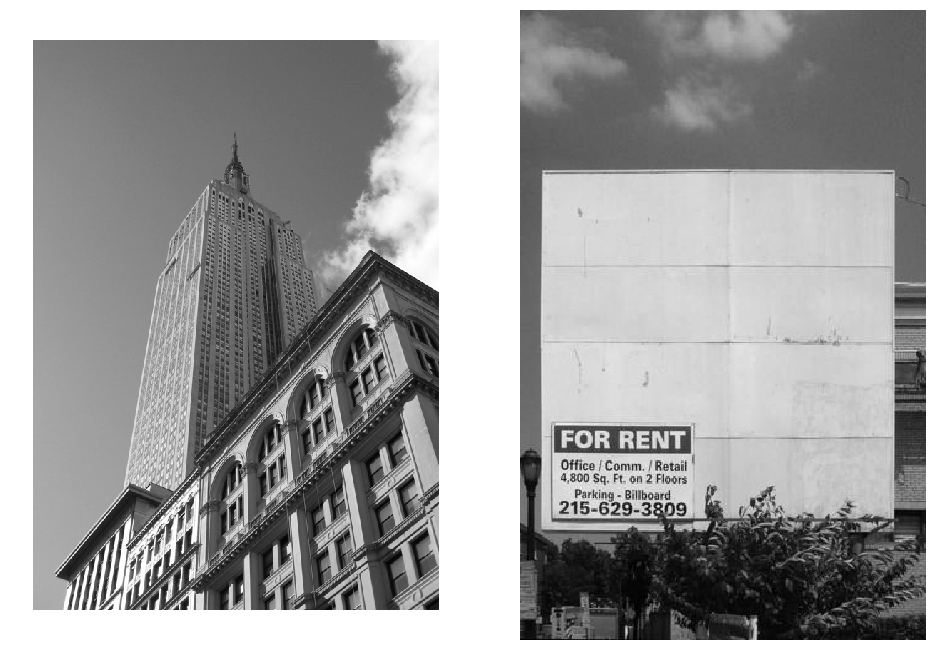

In [60]:
plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(im,cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(im2,cmap=plt.cm.gray)
plt.axis('off')
plt.show()

### 3.2.1 Image In Image

In [131]:
def image_in_image(im1,im2,tp):
    m,n=im1.shape[:2]
    fp=np.array(
        [
            [0,m,m,0],
            [0,0,n,n],
            [1,1,1,1]
        ]        
        )
    H=affine_homo(tp,fp)
#     H=np.linalg.inv(H)
#     H=Haffine_from_points(tp,fp)
    
    # NOTE: wired，it need inverse, and the coordinate x,y is reverse too......
    newim1=ndimage.affine_transform(im1,H[:2,:2],(H[0,2],H[1,2]),im2.shape[:2])
    mask=newim1>0
    comb_im=im2*(1-mask)+mask*newim1
    comb_im=comb_im.astype('uint8')
    return comb_im

In [132]:
im1 = np.array(Image.open('../data/beatles.jpg').convert('L')) 
im2 = np.array(Image.open('../data/billboard_for_rent.jpg').convert('L'))
# 选定一些目标点
# tp = np.array([[131,227,227,131],[19,18,300,301],[1,1,1,1]]) 
tp = array([[337,411,413,335],[27,28,140,140],[1,1,1,1]])
im3 = image_in_image(im1,im2,tp)

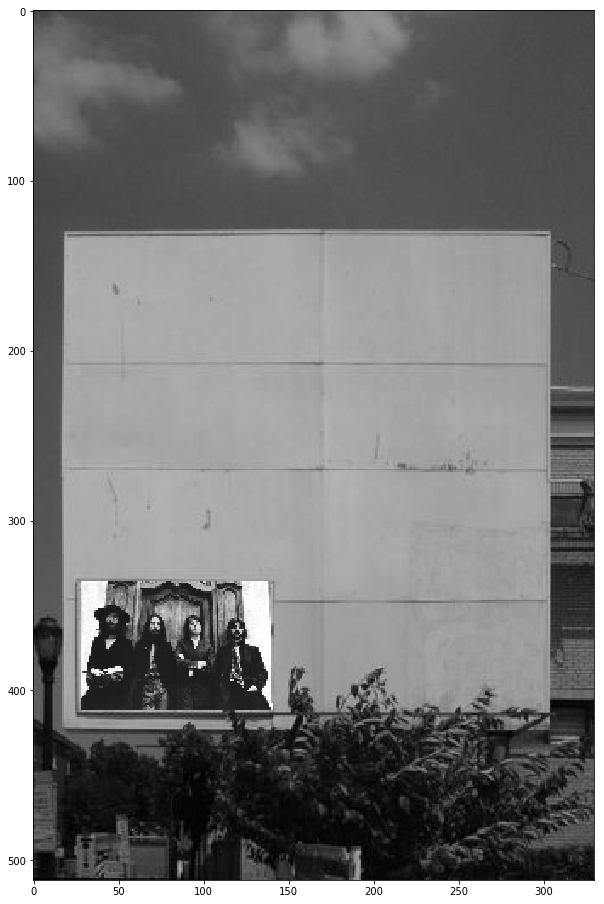

In [133]:
plt.figure(figsize=(16,16))
plt.imshow(im3,cmap=plt.cm.gray)
plt.show()

#### 三角分部映射

In [190]:
def mask_for_triangle(pts,m,n):
    mask=np.zeros([m,n])
    minx=pts[0].min()
    maxx=pts[0].max()
    miny=pts[1].min()
    maxy=pts[1].max()
    
    x1=np.arange(int(minx),int(maxx)+1)
    y1=np.arange(int(miny),int(maxy)+1)
    idx_j,idx_i=np.meshgrid(x1,y1)

    b=np.concatenate([idx_j[...,None],
                      idx_i[...,None],
                      np.full( idx_j.shape,1.0)[...,None]]
                      ,axis=2).reshape(-1,3).T # [3,dy*dx]
    # use svd to solve the least square
    USE_SVD=False
    if USE_SVD:
        v,f,u=np.linalg.svd(pts)
        x=u.T @ ((v.T @ b)/f[:,None])
    else:
        x=np.linalg.inv(pts)@b
    
    x=np.nan_to_num(x)
    mask[idx_i,idx_j]=(x.min(axis=0)>0).reshape(idx_j.shape)
    
    return mask.astype('uint8')

In [191]:
pts=np.array([[10,200,150],
              [70,90,10],
              [1,1,1]])
mask=mask_for_triangle(pts,500,500)

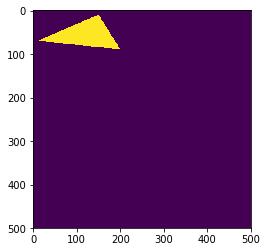

In [192]:
# plt.figure(figsize=(16,16))
plt.imshow(mask.astype('uint8'))
plt.show()

In [209]:
# two triangles for matching...
m,n=im1.shape
tp = np.array([[337,411,413,335],[27,28,140,140],[1,1,1,1]])
tp1=tp[:,:3]
tp2=tp[:,[0,2,3]]

fp1=np.array([
                 [0,m-1,m-1],
                 [0,0,n-1],
                 [1,1,1]])
fp2=np.array([[0,m-1,0],
              [0,n-1,n-1],
              [1,1,1]])

h1=affine_homo(tp1,fp1)
h2=affine_homo(tp2,fp2)

mask1=mask_for_triangle(tp1[[1,0,2]],*im2.shape[:2])
mask2=mask_for_triangle(tp2[[1,0,2]],*im2.shape[:2])

patch1=ndimage.affine_transform(im1,h1[:2,:2],(h1[0,2],h1[1,2]),im2.shape)
patch2=ndimage.affine_transform(im1,h2[:2,:2],(h2[0,2],h2[1,2]),im2.shape)

In [211]:
synthetic_img= (~(mask1+mask2).astype('bool') )*im2+(mask1)*patch1+mask2*patch2

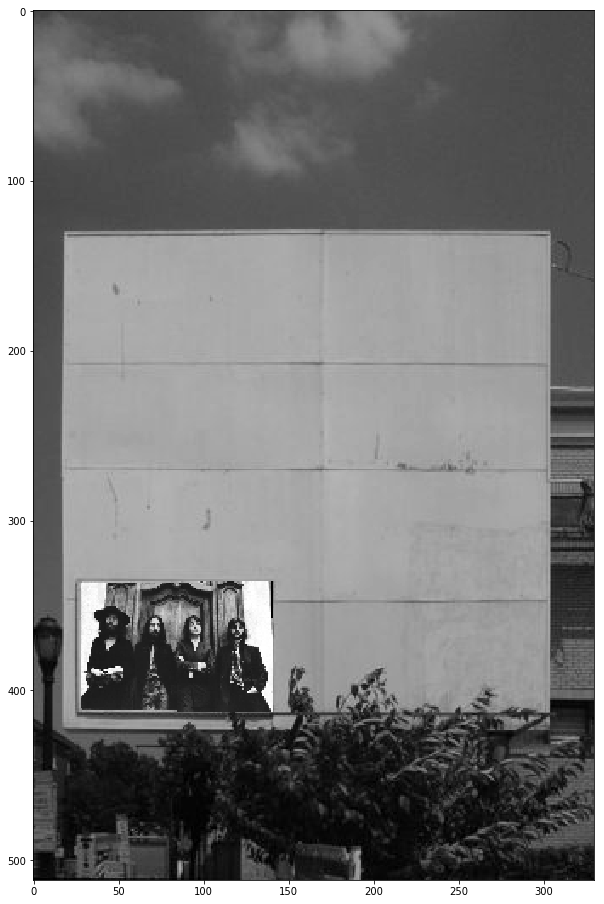

In [219]:
plt.figure(figsize=(16,16))
plt.imshow(synthetic_img,cmap=plt.cm.gray)
plt.show()

### 3.2.2 分段仿射扭曲

In [231]:
from scipy.spatial import Delaunay

In [234]:
x=np.array([1,2,3])

In [251]:
dx=Delaunay(tp1[:2].T)

In [297]:
tri_pts=np.random.randn(100,2)

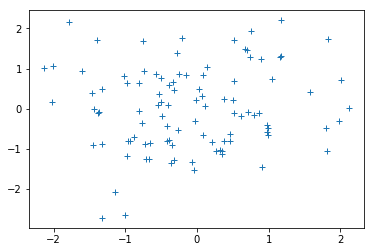

In [302]:
plt.plot(tri_pts[:,0],tri_pts[:,1],'+')

In [311]:
indices=Delaunay(tri_pts).simplices

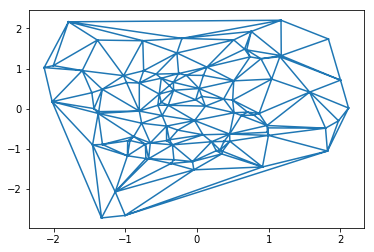

In [323]:
plt.triplot(tri_pts[:,0],tri_pts[:,1],triangles=indices)
plt.show()

In [325]:
im1 = array(Image.open('../data/sunset_tree.jpg'))
im2 = array(Image.open('../data/turningtorso1.jpg'))

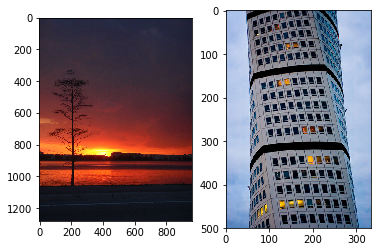

In [326]:
plt.subplot(1,2,1)
plt.imshow(im1)
plt.subplot(1,2,2)
plt.imshow(im2)

In [353]:
pt_x,pt_y=np.meshgrid(np.linspace(0,im1.shape[1],5),np.linspace(0,im1.shape[0],6))

In [354]:
pt_x=pt_x.reshape(-1,1)
pt_y=pt_y.reshape(-1,1)

In [355]:
tri_pts=Delaunay( np.concatenate([pt_x,pt_y],axis=1 )).simplices

In [371]:
tpo=np.loadtxt('../data/turningtorso1_points.txt')

In [425]:
synthetic_img=im2.copy()
for idx_fp in tri_pts:
    fp=np.array([pt_y[:,0][idx_fp],pt_x[:,0][idx_fp],[1,1,1]])
    tp=np.array([tpo[:,1][idx_fp],tpo[:,0][idx_fp],[1,1,1]])
    h=affine_homo(tp,fp)
    
    # but mask uses coordinate `xy`...
    patch_mask=mask_for_triangle(tp[[1,0,2]],*im2.shape[:2])>0

    for i in range(3):
        im_patch=ndimage.affine_transform(im1[...,i],h[:2,:2],(h[0,2],h[1,2]),im2.shape[:2])
        synthetic_img[...,i][patch_mask]=im_patch[patch_mask]
#     plt.imshow(synthetic_img)
#     plt.show()

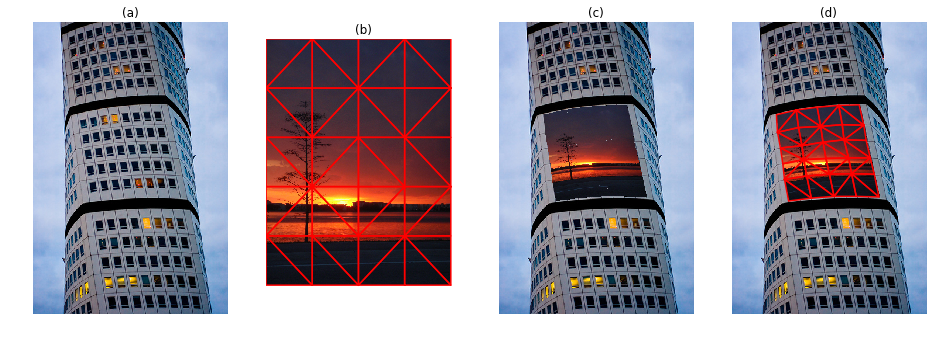

In [426]:
plt.figure(figsize=(16,16))

plt.subplot(1,4,1)
plt.imshow(im2)
plt.title('(a)')
# plt.axis('equal')
plt.axis('off')


plt.subplot(1,4,2)
plt.imshow(im1)
plt.title('(b)')
for i1,i2,i3 in tri_pts:
    idx=[i1,i2,i3,i1]
    plt.plot(pt_x[idx],pt_y[idx],'r')
# plt.axis('equal')
plt.axis('off')


plt.subplot(1,4,3)
plt.imshow(synthetic_img)
plt.title('(c)')
# plt.axis('equal')
plt.axis('off')

plt.subplot(1,4,4)
for i1,i2,i3 in tri_pts:
    idx=[i1,i2,i3,i1]
    plt.plot(tpo[:,0][idx],tpo[:,1][idx],'r')
    
plt.imshow(synthetic_img)
plt.title('(d)')
# plt.axis('equal')
plt.axis('off')

plt.show()

### 3.2.3 图像配准

$$
    \mathbf{A}\mathbf{p}
    =s\mathbf{Rp}+\mathbf{t}
    =\left[ \begin{matrix} a & -b \\ b & a \end{matrix} \right] \mathbf{p}+\mathbf{t}
    =s\left[ \begin{matrix} \cos\theta &-\sin\theta \\ \sin\theta & \cos\theta  \end{matrix}  \right] \mathbf{p}+\mathbf{t}
    =\mathbf{p}',
$$
where $s=\sqrt{a^2+b^2}$.

$$
    \begin{matrix}
         ax-by+t_x=\hat{x}\\
         bx+ay+t_y=\hat{y} 
    \end{matrix}
$$

thus we can obtain:
$$
    \left[
        \begin{matrix}
            x_1 & -y_1 & 1 & 0\\
            y_1 & x_1  & 0 & 1\\ 
            x_2 & -y_2 & 1 & 0\\
            y_2 & x_2  & 0 & 1\\ 
            x_3 & -y_3 & 1 & 0\\
            y_3 & x_3  & 0 & 1\\ 
        \end{matrix}
    \right]
    \left[
        \begin{matrix}
            a\\
            b\\
            t_x\\
            t_y
        \end{matrix}
    \right]
    =
    \left[
        \begin{matrix}
           \hat{x}_1
           \\
           \hat{y}_1
           \\
           \hat{x}_2
           \\
           \hat{y}_2
           \\
           \hat{x}_3
           \\
           \hat{y}_3
           \\
        \end{matrix}
    \right]
$$

In [433]:
import glob
import os

In [443]:
from xml.dom import minidom

In [445]:
img_paths=glob.glob('../data/jkfaces/*.jpg')

In [467]:
ori_imgs={ _.split('/')[-1]: np.array(Image.open(_)) for _ in img_paths}

In [444]:
def read_points_from_xml(xmlFileName): 
    """ 读取用于人脸对齐的控制点 """

    xmldoc = minidom.parse(xmlFileName) 
    facelist = xmldoc.getElementsByTagName('face') 
    faces = {}

    for xmlFace in facelist: 
        fileName = xmlFace.attributes['file'].value 
        xf = int(xmlFace.attributes['xf'].value) 
        yf = int(xmlFace.attributes['yf'].value) 
        xs = int(xmlFace.attributes['xs'].value) 
        ys = int(xmlFace.attributes['ys'].value) 
        xm = int(xmlFace.attributes['xm'].value) 
        ym = int(xmlFace.attributes['ym'].value) 
        faces[fileName] = array([xf, yf, xs, ys, xm, ym])

    return faces

In [448]:
xml_faces=read_points_from_xml('../data/jkfaces.xml')

In [550]:
def rigid_transformation(fp,tp):
    """
    Args:
        fp (np.ndarray(float32)[2,n])
        tp (np.ndarray(float32)[2,n])
    Return:
        A  (np.ndarray(float32)[2,2])
        tx (float32)
        ty (float32)
    """
    _,n=fp.shape
    x1=np.concatenate([fp.T.reshape(-1)[:,None],
                    fp[[1,0]].T.reshape(-1)[:,None],
                    np.ones((2*n,2))],axis=1).reshape(n,2,4) # [n,2,4]
    x2=np.array([[1,-1,1,0],[1,1,0,1]])[None] # [1,2,4]
    X=x1*x2 # [n,2,4]
    X=X.reshape(-1,4) # [2n,4]
    tp=tp.T.reshape(-1) # [2n] 
#     a,b,tx,ty=np.linalg.lstsq(X,tp)[0]
    u,s,v=np.linalg.svd(X)
    a,b,tx,ty= v.T@ (( u.T@ tp)[:v.shape[0]]/ s )
    
    sR=np.array([[a,-b],[b,a]])
    return sR,tx,ty

In [660]:
tp=None
resized_imgs=[]
aligned_imgs=[]
relative_imgs=[]
for idx,(imName,im) in enumerate(ori_imgs.items()):
    face=faces[imName]

    face=face.reshape(3,2).T[[1,0]] # y first
#     im=cv2.resize(im,(200,300),cv2.INTER_LINEAR)
    resized_imgs+=[cv2.resize(im,(200,300),cv2.INTER_LINEAR)]
    processed_img=None
    h,w,c=im.shape
#     face=face/np.array([[h],[w]])

    border=(h+w)//20
    if tp is None:
        tp=face
        processed_img=im
    else:
        sR,tx,ty=rigid_transformation(tp,face)
        processed_img= np.array([ndimage.affine_transform(im[...,i],sR,(tx,ty)) for i in range(3) ]).transpose(1,2,0)
#     if idx>30:
#         break
    processed_img=processed_img[border:h-border,border:w-border]
    aligned_imgs+=[cv2.resize(processed_img,(200,300),cv2.INTER_LINEAR)]
#     print(imName,processed_img.shape)
    
#     plt.imshow(processed_img)
#     plt.title(imName)
#     plt.show()
    if not os.path.exists('./aligned'):
        os.mkdir('./aligned')
    Image.fromarray(processed_img).save('./aligned/%s'%(imName))
    rlt_im=np.array(Image.open('../data/jkfaces/aligned/%s' %(imName) ))
    relative_imgs+=[cv2.resize(rlt_im,(200,300),cv2.INTER_LINEAR)]
#     plt.subplot(1,2,1)
#     plt.imshow(rlt_im)
#     plt.subplot(1,2,2)
#     plt.imshow(processed_img)
#     plt.show()

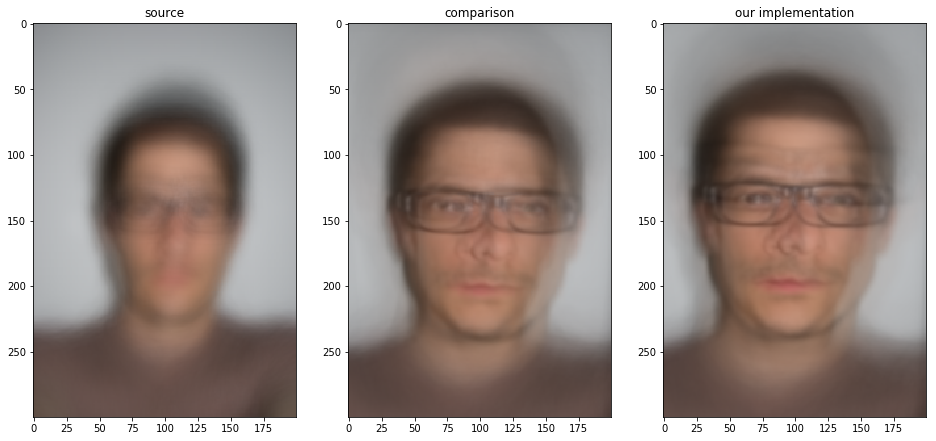

In [661]:
# mean average
plt.figure(figsize=(16,16))
mOri=np.array(resized_imgs).mean(axis=0).astype('uint8')
mRel=np.array(relative_imgs).mean(axis=0).astype('uint8')
mAlign=np.array(aligned_imgs).mean(axis=0).astype('uint8')

plt.subplot(1,3,1)
plt.imshow(mOri)
plt.title('source')
plt.subplot(1,3,2)
plt.imshow(mRel)
plt.title('comparison')
plt.subplot(1,3,3)
plt.imshow(mAlign)
plt.title('our implementation')
plt.show()

In [634]:
ellipse_mask1=mOri.copy()
idx_j,idx_i=np.meshgrid(range(mOri.shape[1]),range(mOri.shape[0]))
mask1=((idx_j-105)**2/(50**2)+(idx_i-150)**2/(80**2))<=1
ellipse_mask1[~mask1]=0

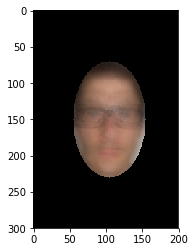

In [635]:
plt.imshow(ellipse_mask1)

In [722]:
ellipse_mask2=mAlign.copy()
idx_j,idx_i=np.meshgrid(range(mAlign.shape[1]),range(mAlign.shape[0]))
mask2=((idx_j-95)**2/(75**2)+(idx_i-140)**2/(110**2))<=1
ellipse_mask2[~mask2]=0

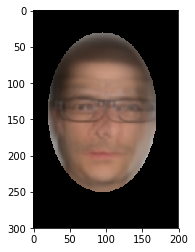

In [723]:
plt.imshow(ellipse_mask2)

In [710]:
# pca
# x=u s v [d,n] d >> n
# x'x= v' s s v
# xx'=u s s u'
# u= xv's^-1
# u[d,d] v[n,n] s[d,n] 

ori_x=np.array([ mask1*np.array(Image.fromarray(im).convert("L")) for im in resized_imgs] ) # [n, h, w]
n,h,w=ori_x.shape
ori_x=ori_x.reshape(n,-1).T # [d,n]
ori_x=ori_x/255

In [711]:
ori_x=ori_x-ori_x.mean(axis=1)[:,None]

In [712]:
vt,ss,v=np.linalg.svd(ori_x.T @ ori_x)

In [713]:
s=np.sqrt(ss) # [n]
u=ori_x@vt # [d,n]
u=u/s[None] # [d,n]

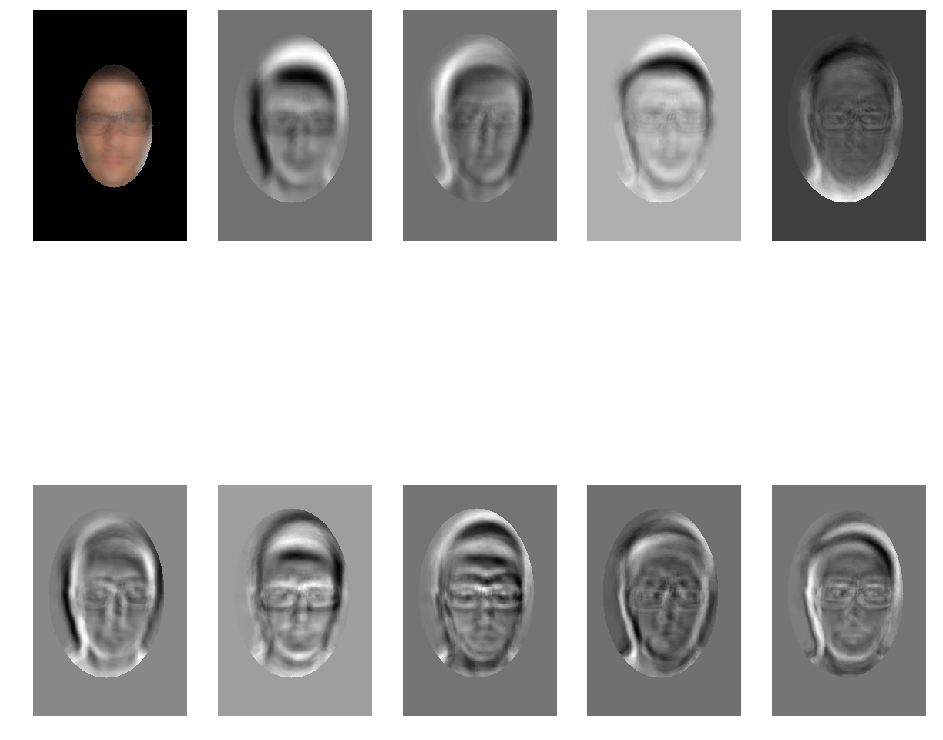

In [719]:
plt.figure(figsize=(16,16))
plt.subplot(2,5,1)
plt.imshow(ellipse_mask1)
plt.axis('off')
for i in range(9):
    plt.subplot(2,5,i+2)
    plt.imshow(u[:,i].reshape(h,w),cmap=plt.cm.gray)
    plt.axis('off')


In [724]:
# pca
# x=u s v [d,n] d >> n
# x'x= v' s s v
# xx'=u s s u'
# u= xv's^-1
# u[d,d] v[n,n] s[d,n] 

align_x=np.array([ mask2*np.array(Image.fromarray(im).convert("L")) for im in aligned_imgs] ) # [n, h, w]
n,h,w=align_x.shape
align_x=align_x.reshape(n,-1).T # [d,n]
align_x=align_x/255

In [725]:
align_x=align_x-align_x.mean(axis=1)[:,None]

In [726]:
vt,ss,v=np.linalg.svd(align_x.T @ align_x)

In [727]:
s=np.sqrt(ss) # [n]
u=ori_x@vt # [d,n]
u=u/s[None] # [d,n]

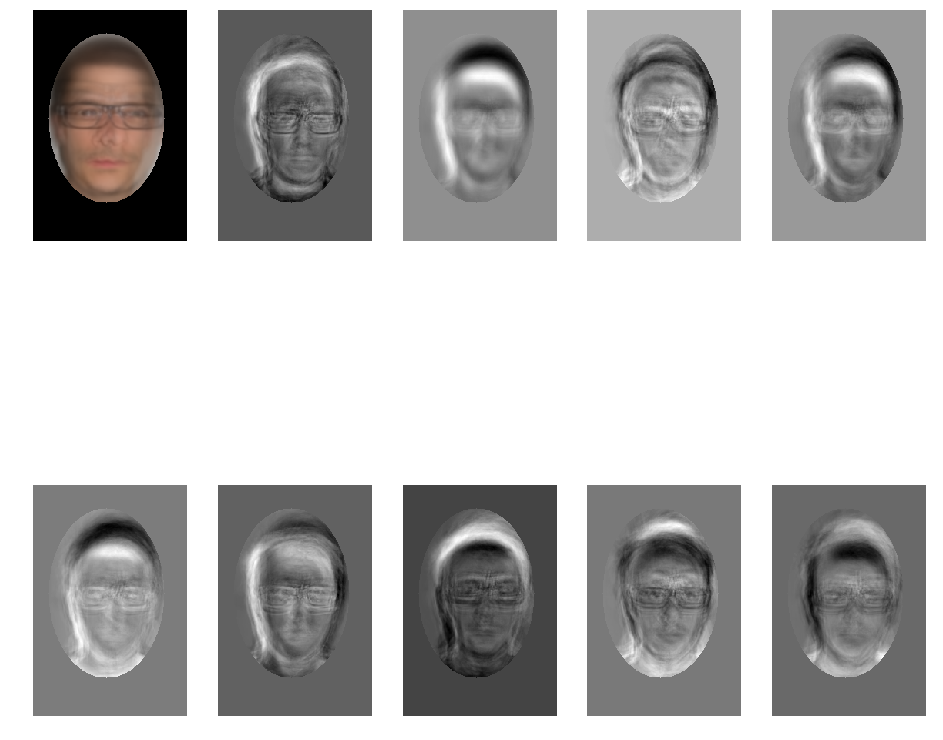

In [728]:
plt.figure(figsize=(16,16))
plt.subplot(2,5,1)
plt.imshow(ellipse_mask2)
plt.axis('off')
for i in range(9):
    plt.subplot(2,5,i+2)
    plt.imshow(u[:,i].reshape(h,w),cmap=plt.cm.gray)
    plt.axis('off')


## 3.3 创建全景图

In [732]:
import ransac

In [742]:
def sift_match_once(desp1,desp2):
    """
    Match the best similar points from desp2.
    Args:
        desp1 (np.ndarray(float)[n1,128])
        desp2 (np.ndarray(float)[n2,128])
    Return:
        idx (np.ndarray(int)[n1])
    """
    # 1. normalize to unit vector
    f1=desp1/(np.linalg.norm(desp1,axis=1)[:,None])
    f2=desp2/(np.linalg.norm(desp2,axis=1)[:,None])
    
    cos_sim=f1@f2.T
    ang_dis=np.arccos(cos_sim)
    ang_idx=ang_dis.argsort()
    
    # 2. use ratio ssd to alleviate the ambiguous pair points
    dis_ratio=.6
    i1,i2=ang_dis[range(len(ang_dis)),ang_idx[:,0]],ang_dis[range(len(ang_dis)),ang_idx[:,1]]
    dis_mask=i1< i2*dis_ratio
    idx=np.full(dis_mask.shape,-1)
    idx[dis_mask]=ang_idx[:,0][dis_mask]
    
    return idx

In [743]:
def sift_match(p1,p2,desp1,desp2):
    """
    Two side SIFT match.
    Args:
        p1 (np.ndarray(float)[n1,2])
        p2 (np.ndarray(float)[n2,2])
        desp1 (np.ndarray(float)[n1,128])
        desp2 (np.ndarray(float)[n2,128])
    Return:
        match_point(np.ndarray(int)[n',4]): format is `x1y1x2y2`
    """
    idx1=sift_match_once(desp1,desp2) # [n1]
    idx2=sift_match_once(desp2,desp1) # [n2]
    
    map_idx1=np.full((len(idx2)+1),-2)
    map_idx1[idx1]=range(len(idx1))
    map_idx1=map_idx1[:len(map_idx1)-1]
    same_mask=map_idx1==idx2
    
#     print(same_mask)
    re_p2=p2[same_mask] # [n',2]
    re_p1=p1[idx2[same_mask]]
    
    return np.concatenate([re_p1,re_p2],axis=1) # [n',4]

In [ ]:
# SIFT example
sift = cv2.xfeatures2d.SIFT_create()
p1,des1 = sift.detectAndCompute(im1,None)
p2,des2 = sift.detectAndCompute(im2,None)
p1=[_.pt for _ in p1]
p2=[_.pt for _ in p2]
p1=np.array(p1)
p2=np.array(p2)
match_points=sift_match(p1,p2,des1,des2)

In [917]:
class HModel:
    
    def __init__(self):
        pass
    
    def fit(self,data):
        """
        Args:
            data (np.ndarray(float)[n',3+3]): n' here is 4, the coordinate is homogeneous
        Return:
            h (np.ndarray(float)[3,3]): homography matrix
        """
        data=data.T
        fp=data[:3,:4]
        tp=data[3:,:4]
        
        return homo_dlt(fp,tp)
    
    def get_error( self, data, model):
        """
        Erorrs corresponding each point
        """
        data=data.T
        fp=data[:3]
        tp=data[3:]
        fp_=model @ fp
        fp_=fp_/fp_[2][None]
        
        errors=np.sqrt(((fp_-tp)**2).sum(axis=0))
#         print(errors)
        return errors

In [749]:
img_paths=['Univ1.jpg','Univ2.jpg','Univ3.jpg','Univ4.jpg','Univ5.jpg']

In [766]:
imgs=[np.array(Image.open('../data/'+_)) for _ in img_paths[::-1]]

In [767]:
imgs=np.array(imgs)

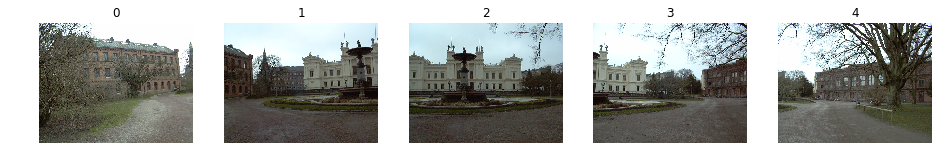

In [815]:
plt.figure(figsize=(16,16))
for i,im in enumerate(imgs):
    plt.subplot(1,len(imgs),i+1)
    plt.imshow(im)
    plt.title('%s'%(i))
    plt.axis('off')
plt.show()

In [812]:
sift = cv2.xfeatures2d.SIFT_create()
# p1,des1 = sift.detectAndCompute(im1,None)
pt_list=[]
desc_list=[]

for im in imgs:
    p1,des1=sift.detectAndCompute(im,None)
    pt_list+=[np.array([_.pt for _ in p1 ])]
    desc_list+=[des1]

In [873]:
im0=imgs[0]
im1=imgs[1]
im2=imgs[2]
im3=imgs[3]
im4=imgs[4]

In [819]:
match_pt_list=[]
for i,j in [[1,2],[2,3],[0,1],[3,4]]:
    match_pt_list+=[sift_match(pt_list[i],pt_list[j],desc_list[i],desc_list[j])]

In [998]:
match_12=match_pt_list[0]
match_12=np.hstack((match_12[:,[3,2]] , np.ones([len(match_12),1]),match_12[:,[1,0]],np.ones([len(match_12),1]) ) )

match_01=match_pt_list[2]
match_01=np.hstack((match_01[:,[3,2]] , np.ones([len(match_01),1]),match_01[:,[1,0]],np.ones([len(match_01),1]) ) )

match_23=match_pt_list[1]
match_23=np.hstack((match_23[:,[3,2]] , np.ones([len(match_23),1]),match_23[:,[1,0]],np.ones([len(match_23),1]) ) )

match_34=match_pt_list[3]
match_34=np.hstack((match_34[:,[3,2]] , np.ones([len(match_34),1]),match_34[:,[1,0]],np.ones([len(match_34),1]) ) )

In [918]:
h_model=HModel()

In [999]:
h12=ransac.ransac(match_12,h_model,4,1000,10,10,return_all=True)[0]

h01=ransac.ransac(match_01,h_model,4,1000,10,10,return_all=True)[0]

h23=ransac.ransac(match_23,h_model,4,1000,10,10,return_all=True)[0]

h34=ransac.ransac(match_34,h_model,4,1000,10,10,return_all=True)[0]

In [885]:
# im1_pad=np.concatenate([np.zeros([im1.shape[0],2000,3]),im1],axis=1)

In [946]:
def transf(p):
    p_=h12 @ np.array([p[0],p[1]-2000,1])
    p_=p_/p_[2][None]
    return  (p_[0],p_[1])

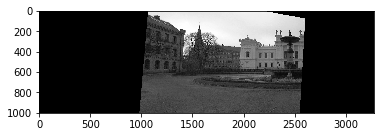

In [947]:
plt.imshow(ndimage.geometric_transform(im1[...,0],transf,(im1.shape[0],im1.shape[1]+2000) ),cmap=plt.cm.gray)

#### 拼接

In [1025]:
def panorama(H,fim,tim,padding=2400,x_offset=2400):
    def transf(p):
        p_t=H @ np.array([p[0],p[1],1])
        p_t=p_t/p_t[2][None]
        return (p_t[0],p_t[1])
    
    H=H.copy()
    H=H @ np.array([[1,0,0],[0,1,-x_offset],[0,0,1]])
    if H[1,2]>0: # fim is on the left
        # shift to
        tim=np.hstack((np.zeros((tim.shape[0],padding,3)).astype('uint8'),tim))
        fim_t=np.zeros(tim.shape)
        for i in range(3):
            fim_t[...,i]=ndimage.geometric_transform(fim[...,i],transf,tim.shape[:2])
#             fim_t[...,i]=ndimage.affine_transform(fim[...,i],H[:2,:2],(H[0,2],H[1,2]),tim.shape[:2])
    else:
        tim=np.hstack( (tim,np.zeros((tim.shape[0],padding,3)).astype('uint8') ) )
        fim_t=np.zeros(tim.shape)
        for i in range(3):
            fim_t[...,i]=ndimage.geometric_transform(fim[...,i],transf,tim.shape[:2])
#             fim_t[...,i]=ndimage.geometric_transform(fim[...,i],H[:2,:2],(H[0,2],H[1,2]),tim.shape[:2])

    mask=fim_t>0
    tim[mask]=fim_t[mask]
    return tim

In [1009]:
imc=panorama(h12,im1,im2)

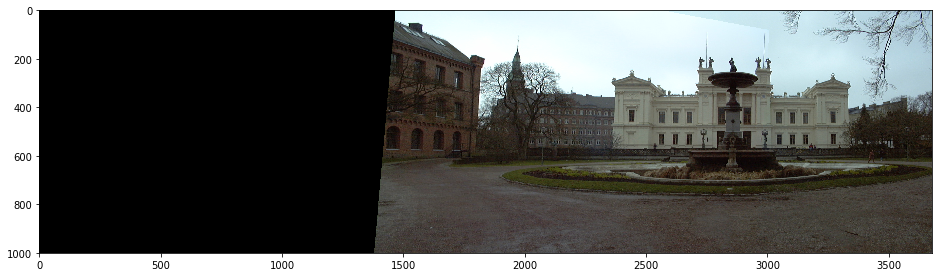

In [1011]:
plt.figure(figsize=(16,16))
plt.imshow(imc)

In [1013]:
imc2=panorama(h01@h12,im0,imc,padding=0)

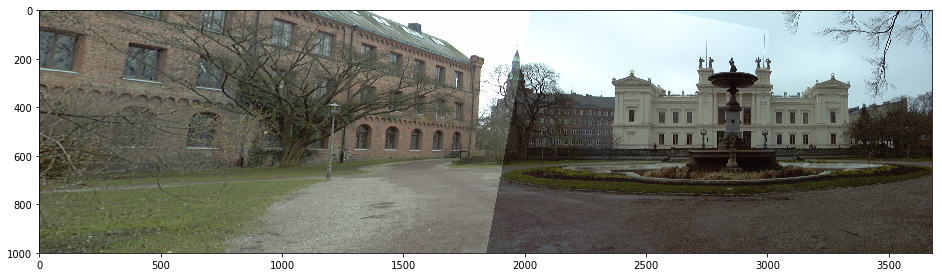

In [1014]:
plt.figure(figsize=(16,16))
plt.imshow(imc2)

In [1027]:
imc3=panorama(np.linalg.inv(h23),im3,imc2,x_offset=2400,padding=2400)

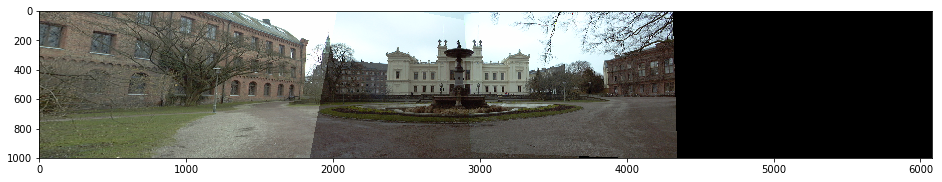

In [1028]:
plt.figure(figsize=(16,16))
plt.imshow(imc3)
plt.show()

In [1029]:
im1.shape,imc.shape,imc2.shape,imc3.shape

((1000, 1280, 3), (1000, 3680, 3), (1000, 3680, 3), (1000, 6080, 3))

In [1033]:
imc4=panorama(np.linalg.inv(h23@h34),im4,imc3,x_offset=2400,padding=0)

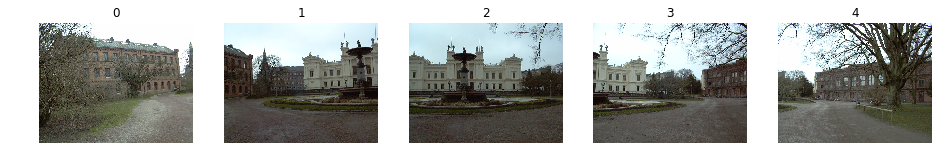

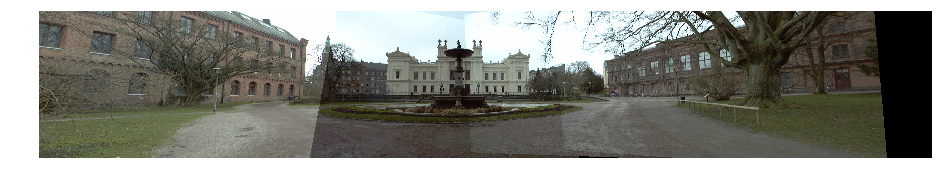

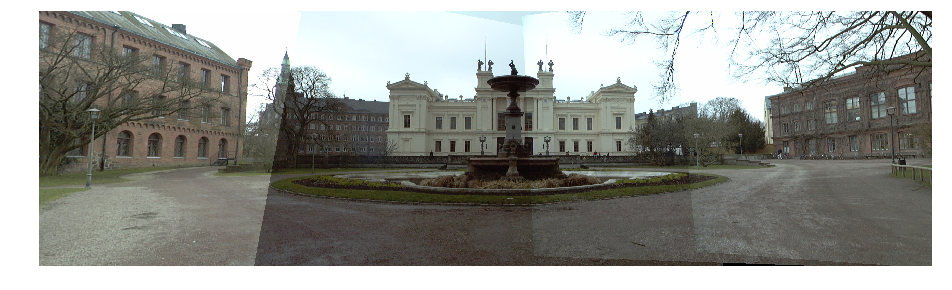

In [1038]:
plt.figure(figsize=(16,16))
for i,im in enumerate(imgs):
    plt.subplot(1,len(imgs),i+1)
    plt.imshow(im)
    plt.title('%s'%(i))
    plt.axis('off')
plt.show()

plt.figure(figsize=(16,16))
plt.imshow(imc4)
plt.axis('off')
plt.show()

plt.figure(figsize=(16,16))
plt.imshow(imc4[:,1000:4500])
plt.axis('off')
plt.show()

# 练习

### (1) 写出一个函数，其输入参数为正方形（或者长方形）物体（例如，一本书、一张海报，或者二维条形码）图像的坐标。然后，计算将该长方形映射归一化坐标系中正视图全图的变换。你可以使用ginput()，或者最强的Harris角点来发现长方形物体的稳健性角点。

In [1039]:
im=np.array(Image.open('../data/book_perspective.JPG'))

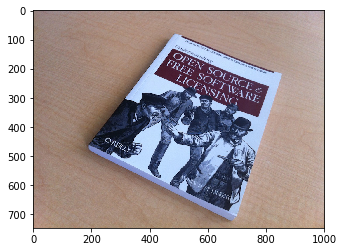

In [1041]:
plt.imshow(im)
plt.show()

In [1044]:
im.shape

(747, 1000, 3)

In [1043]:
fpts=np.array([[80,461,698,218],
               [484,191,698,852],
               [1,1,1,1]])

In [1045]:
tpts=np.array([[0,747,747,0],
               [0,0,1000,1000],
               [1,1,1,1]])

In [1062]:
h=homo_dlt(tpts,fpts)
# h=affine_homo(tpts,fpts)

def transf(p):
    p_t=h@np.array([p[0],p[1],1])
    p_t=p_t/p_t[2]
    return (p_t[0],p_t[1])

img_t=np.zeros(im.shape)
for i in range(3):
    img_t[...,i]=ndimage.geometric_transform(im[...,i],transf,im.shape[:2])    
#     img_t[...,i]=ndimage.affine_transform(im[...,i],h[:2,:2],(h[0,2],h[1,2]) )

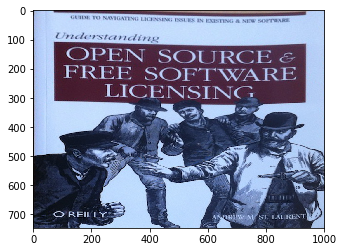

In [1063]:
plt.imshow(img_t.astype('uint8'))

### (2) 写出一个函数，对于如图3-1所示的扭曲能够正确地找到alpha图像。

In [ ]:
alpha=

### (3) 在你自己的数据集中找出包含三个公共的标记物（像人脸例子一样，或者使用著名的景物，比如埃菲尔铁塔）的那个。创建对齐后的图像，其中这些标记物在同一个位置上。计算平均和中值图像，然后可视化。

把人脸替换为其他的就行了

### (4) 进行亮度归一化操作，找出在全景图像例子中更好地拼接图像的方法。该方法能够去除图3-12中的边缘效应。

拼接附近滤波？直方图均衡化？ 

### (5) 与将图像扭曲到中心图像上不同，全景图像可以通过将图像扭曲到圆柱体上来创建。试着在图3-12的例子中使用该方式创建全景图像。

扭曲到圆柱体？纹理映射？

### (6) 使用RANSAC算法来找到一些主要的正确单应性矩阵集合。一个简单的方式是，首先运行一次RANSAC算法，找到具有最大一致子集的单应性矩阵，然后将与该单应性矩阵一致的对应点对从匹配集合中删除，再运行RANSAC算法找到下一个最大的集合，以此类推。

ICA?

### (7) 修改单应性矩阵的RANSAC估计算法，来使用三个对应点对计算仿射变换。使用该算法来判断图像对之间是否包含平面场景，例如使用正确点的个数。对于仿射变化，平面场景中正确点的个数会很多。

什么叫平面场景？使用RANSAC得到最小error的点对集合，以点对集合的个数作为是否是平面的置信度？

### (8) 通过匹配局部特征，以及使用最小二乘刚体配准，用多个图像（例如，从Flickr[下载](http://en.wikipedia.org/wiki/Panography)）创建一个全景图。

...